# Import Package

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [ ]:
df = pd.read_excel('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')

In [ ]:
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,...,+6283343465xxx,dopeySheep0297@icloud.com,Sarjana,1,NaN,NaN,1973-12-08,2011-9-26,2016-03-01,-
283,yearningPorpoise4,106254,-,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,...,+6281222782xxx,yearningPorpoise4421@yahoo.com,Sarjana,1,NaN,jam_kerja,1974-12-01,2013-5-13,2020-1-28,2017-11-15
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,...,+6285821950xxx,murkySausage9688@yahoo.com,Sarjana,1,1.0,ganti_karir,1969-10-30,2013-11-11,2020-1-21,2018-06-08
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,...,+6287787391xxx,truthfulMoth4663@yahoo.com,Sarjana,1,0.0,kejelasan_karir,1981-10-01,2011-5-16,2014-04-05,2018-04-01


#Exploratory Data Analysis

In [ ]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [Username, EnterpriseID, StatusPernikahan, JenisKelamin, StatusKepegawaian, Pekerjaan, JenjangKarir, PerformancePegawai, AsalDaerah, HiringPlatform, SkorSurveyEngagement, SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, JumlahKetidakhadiran, NomorHP, Email, TingkatPendidikan, PernahBekerja, IkutProgramLOP, AlasanResign, TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan, TanggalResign]
Index: []

[0 rows x 25 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [ ]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [ ]:
# Fill missing values with column means
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].mean(), inplace=True)
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].mean(), inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].mean(), inplace=True)
df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].mean(), inplace=True)

# Drop the 'IkutProgramLOP' column
df.drop(columns=['IkutProgramLOP'], inplace=True)

# Display the filled DataFrame
print(df.isnull().sum())

Username                               0
EnterpriseID                           0
StatusPernikahan                       0
JenisKelamin                           0
StatusKepegawaian                      0
Pekerjaan                              0
JenjangKarir                           0
PerformancePegawai                     0
AsalDaerah                             0
HiringPlatform                         0
SkorSurveyEngagement                   0
SkorKepuasanPegawai                    0
JumlahKeikutsertaanProjek              0
JumlahKeterlambatanSebulanTerakhir     0
JumlahKetidakhadiran                   0
NomorHP                                0
Email                                  0
TingkatPendidikan                      0
PernahBekerja                          0
AlasanResign                          66
TanggalLahir                           0
TanggalHiring                          0
TanggalPenilaianKaryawan               0
TanggalResign                          0
dtype: int64


In [ ]:
# Fill missing values in the 'AlasanResign' column
df['AlasanResign'].fillna('Tidak_Diketahui', inplace=True)

In [ ]:
df.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: int64

In [ ]:
# Check the unique values and their counts in the 'PernahBekerja' column
pernah_bekerja_counts = df['PernahBekerja'].value_counts()

# Display the unique values and their counts
print(pernah_bekerja_counts)

1      286
yes      1
Name: PernahBekerja, dtype: int64


In [ ]:
# Replace 'yes' with 1 in the 'PernahBekerja' column
df['PernahBekerja'].replace({'yes': 1}, inplace=True)

In [ ]:
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,...,16.0,+6283343465xxx,dopeySheep0297@icloud.com,Sarjana,1,Tidak_Diketahui,1973-12-08,2011-9-26,2016-03-01,-
283,yearningPorpoise4,106254,-,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,...,11.0,+6281222782xxx,yearningPorpoise4421@yahoo.com,Sarjana,1,jam_kerja,1974-12-01,2013-5-13,2020-1-28,2017-11-15
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,...,17.0,+6285821950xxx,murkySausage9688@yahoo.com,Sarjana,1,ganti_karir,1969-10-30,2013-11-11,2020-1-21,2018-06-08
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,...,20.0,+6287787391xxx,truthfulMoth4663@yahoo.com,Sarjana,1,kejelasan_karir,1981-10-01,2011-5-16,2014-04-05,2018-04-01


In [ ]:
# Create the DataFrame
df_unique = pd.DataFrame(df)

# Display unique values in each column
for column in df_unique.columns:
    unique_values = df_unique[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Username': ['spiritedPorpoise3' 'jealousGelding2' 'pluckyMuesli3' 'stressedTruffle1'
 'shyTermite7' 'emptyMacaw4' 'madZebra1' 'cynicalMandrill7' 'lyingMussel8'
 'enviousMoth4' 'puzzledCake4' 'grizzledSnipe7' 'yearningBagels0'
 'sheepishSheep9' 'madWildfowl7' 'enviousSalami4' 'pacifiedRaisins7'
 'wrathfulMagpie6' 'hushedSeahorse7' 'guiltyMoth4' 'peacefulCoati5'
 'dejectedPolenta7' 'needfulLeopard2' 'offendedIguana0' 'pluckyHoopoe3'
 'needySyrup4' 'forsakenOwl1' 'pluckyApples4' 'guiltySnail8'
 'grizzledFlamingo9' 'worriedSyrup7' 'somberBoars0' 'giddyMallard9'
 'madFerret4' 'mereCaribou1' 'decimalAbalone6' 'blissfulMussel3'
 'ardentLapwing0' 'peskyTeal7' 'blissfulHyena1' 'solidMacaw1'
 'cautiousPolenta9' 'excludedPorpoise4' 'shamefulIguana0' 'shySyrup7'
 'forsakenCow7' 'grumpyFish4' 'wingedPorpoise5' 'soreCaribou0'
 'needfulCardinal0' 'giddyCheetah9' 'hushedOil9' 'crummyPudding5'
 'selfishBasmati2' 'adoringCardinal9' 'importedApricots7' 'grizzledCod7'
 'insecureSh

In [ ]:
# Create a DataFrame
single_unique = pd.DataFrame(df)

# Find columns with only one unique value
single_unique_columns = [col for col in single_unique.columns if single_unique[col].nunique() == 1]

# Display columns with only one unique value
print("Columns with only one unique value:")
print(single_unique_columns)

Columns with only one unique value:
['PernahBekerja']


In [ ]:
#drop data
df.drop(columns=['PernahBekerja'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

In [ ]:
# Make Fataframe
df_aggregate = pd.DataFrame(df)

# Convertion colunm TanggalHiring and TanggalResign to datetime
df["TanggalHiring"] = pd.to_datetime(df["TanggalHiring"])
# Change - to 0
df["TanggalResign"].replace("-", "0000-01-01", inplace=True)

# Conversion to datetime
df["TanggalResign"] = pd.to_datetime(df["TanggalResign"], errors="coerce")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [ ]:
# Extract hiring and resign date
df["TahunHiring"] = df["TanggalHiring"].dt.year
df["TahunResign"] = df["TanggalResign"].dt.year

# Aggregate (TanggalHiring)
masuk_agregat = df.groupby("TahunHiring").size().reset_index(name="JumlahKeikutsertaanProjek")

# Aggregate (TanggalResign)
keluar_agregat = df.groupby("TahunResign").size().reset_index(name="JumlahKeikutsertaanProjek")

print("Tabel Agregat Karyawan Masuk:")
print(masuk_agregat)

print("\nTabel Agregat Karyawan Keluar:")
print(keluar_agregat)

Tabel Agregat Karyawan Masuk:
    TahunHiring  JumlahKeikutsertaanProjek
0          2006                          1
1          2007                          2
2          2008                          2
3          2009                          7
4          2010                          8
5          2011                         76
6          2012                         41
7          2013                         43
8          2014                         56
9          2015                         31
10         2016                         14
11         2017                          5
12         2018                          1

Tabel Agregat Karyawan Keluar:
   TahunResign  JumlahKeikutsertaanProjek
0       2013.0                          5
1       2014.0                         12
2       2015.0                          8
3       2016.0                          8
4       2017.0                         19
5       2018.0                         26
6       2019.0                          5


In [ ]:
# Misalkan 'data' adalah DataFrame Anda
df['TahunResign'] = df['TahunResign'].astype('Int64')

In [ ]:
# Membuat tabel terpisah untuk TahunHiring
tahun_hiring = df["TahunHiring"].value_counts().sort_index().reset_index()
tahun_hiring.columns = ["Tahun", "Total Karyawan Hiring"]

# Membuat tabel terpisah untuk TahunResign
tahun_resign = df["TahunResign"].value_counts().sort_index().reset_index()
tahun_resign.columns = ["Tahun", "Total Karyawan Resign"]

# Outer join kedua tabel terpisah
Tahun_Hiring_Resign = pd.merge(tahun_hiring, tahun_resign, on="Tahun", how="outer")

# Mengisi nilai NaN dengan 0
Tahun_Hiring_Resign.fillna(0, inplace=True)

print("Tahun Karyawan Hiring dan Resign:")
print(Tahun_Hiring_Resign)

Tahun Karyawan Hiring dan Resign:
    Tahun  Total Karyawan Hiring  Total Karyawan Resign
0    2006                    1.0                      0
1    2007                    2.0                      0
2    2008                    2.0                      0
3    2009                    7.0                      0
4    2010                    8.0                      0
5    2011                   76.0                      0
6    2012                   41.0                      0
7    2013                   43.0                      5
8    2014                   56.0                     12
9    2015                   31.0                      8
10   2016                   14.0                      8
11   2017                    5.0                     19
12   2018                    1.0                     26
13   2019                    0.0                      5
14   2020                    0.0                      6


In [ ]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                         198
TahunHiring                       

In [ ]:
Tahun_Hiring_Resign

,Tahun,Total Karyawan Hiring,Total Karyawan Resign
0,2006,1.0,0
1,2007,2.0,0
2,2008,2.0,0
3,2009,7.0,0
4,2010,8.0,0
5,2011,76.0,0
6,2012,41.0,0
7,2013,43.0,5
8,2014,56.0,12
9,2015,31.0,8


In [ ]:
# Menghitung total karyawan yang masih bertahan
Tahun_Hiring_Resign["Total Karyawan Masih Bertahan"] = abs(Tahun_Hiring_Resign["Total Karyawan Hiring"] - Tahun_Hiring_Resign["Total Karyawan Resign"])

# Menghitung perubahan karyawan sebagai selisih total karyawan dengan total karyawan resign
Tahun_Hiring_Resign["Perubahan Karyawan"] = abs(Tahun_Hiring_Resign["Total Karyawan Resign"] - Tahun_Hiring_Resign["Total Karyawan Hiring"])

print("Tabel Hasil Perhitungan:")
Tahun_Hiring_Resign

Tabel Hasil Perhitungan:


,Tahun,Total Karyawan Hiring,Total Karyawan Resign,Total Karyawan Masih Bertahan,Perubahan Karyawan
0,2006,1.0,0,1.0,1.0
1,2007,2.0,0,2.0,2.0
2,2008,2.0,0,2.0,2.0
3,2009,7.0,0,7.0,7.0
4,2010,8.0,0,8.0,8.0
5,2011,76.0,0,76.0,76.0
6,2012,41.0,0,41.0,41.0
7,2013,43.0,5,38.0,38.0
8,2014,56.0,12,44.0,44.0
9,2015,31.0,8,23.0,23.0


In [ ]:
# Menambah kolom "Ada Perubahan Karyawan" dengan nilai "Yes" jika ada perubahan, dan "No" jika tidak ada
Tahun_Hiring_Resign["Ada Perubahan Karyawan"] = Tahun_Hiring_Resign["Perubahan Karyawan"].apply(lambda x: "Ya" if x > 0 else "Tidak")
Tahun_Hiring_Resign

,Tahun,Total Karyawan Hiring,Total Karyawan Resign,Total Karyawan Masih Bertahan,Perubahan Karyawan,Ada Perubahan Karyawan
0,2006,1.0,0,1.0,1.0,Ya
1,2007,2.0,0,2.0,2.0,Ya
2,2008,2.0,0,2.0,2.0,Ya
3,2009,7.0,0,7.0,7.0,Ya
4,2010,8.0,0,8.0,8.0,Ya
5,2011,76.0,0,76.0,76.0,Ya
6,2012,41.0,0,41.0,41.0,Ya
7,2013,43.0,5,38.0,38.0,Ya
8,2014,56.0,12,44.0,44.0,Ya
9,2015,31.0,8,23.0,23.0,Ya


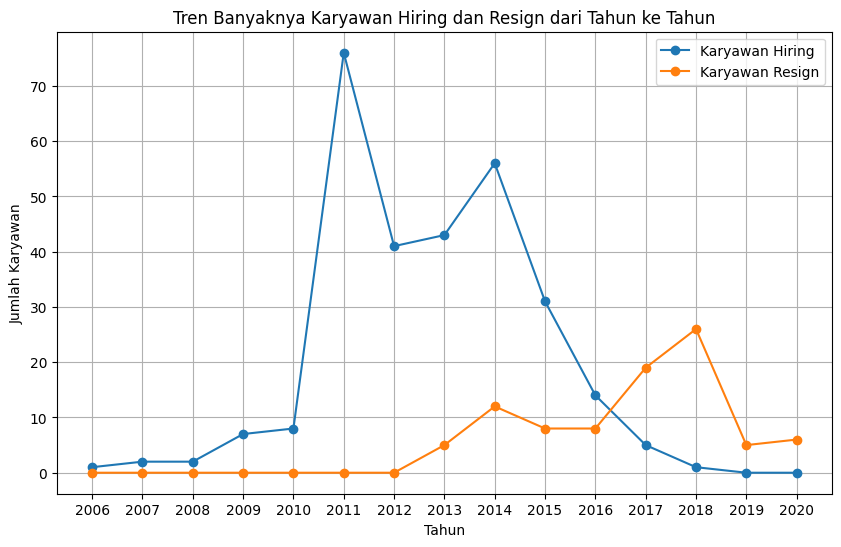

In [ ]:
# Menggantikan tipe data float menjadi integer
Tahun_Hiring_Resign['Tahun'] = Tahun_Hiring_Resign['Tahun'].astype(int)

# Menyiapkan data untuk diagram garis
years = Tahun_Hiring_Resign["Tahun"]
hiring = Tahun_Hiring_Resign["Total Karyawan Hiring"]
resign = Tahun_Hiring_Resign["Total Karyawan Resign"]

# Membuat ukuran gambar lebih besar
plt.figure(figsize=(10, 6))  # Ubah ukuran sesuai kebutuhan (lebar x tinggi)

# Membuat diagram garis
plt.plot(years, hiring, marker='o', label='Karyawan Hiring')
plt.plot(years, resign, marker='o', label='Karyawan Resign')

# Menambahkan judul, label sumbu, legenda, dan grid
plt.title("Tren Banyaknya Karyawan Hiring dan Resign dari Tahun ke Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Karyawan")
plt.xticks(years)  # Mengganti angka dengan label tahun, dan rotasi 45 derajat
plt.legend()
plt.grid(True)

# Menampilkan diagram
plt.show()

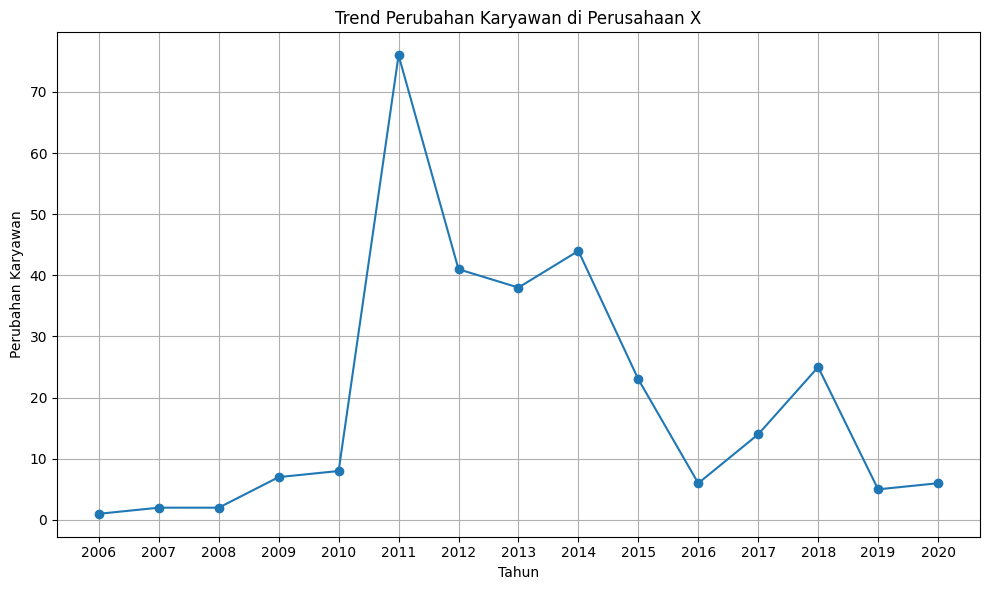

In [ ]:
# Plot tren chart perubahan karyawan dengan line plot
plt.figure(figsize=(10, 6))
plt.plot(Tahun_Hiring_Resign["Tahun"], Tahun_Hiring_Resign["Perubahan Karyawan"], marker='o')
plt.xlabel('Tahun')
plt.ylabel('Perubahan Karyawan')
plt.title('Trend Perubahan Karyawan di Perusahaan X')
plt.xticks(Tahun_Hiring_Resign["Tahun"])
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan analisis tren jumlah karyawan yang dipekerjakan dan mengundurkan diri dari tahun ke tahun, pada awal-awal tahun perusahaan didirikan pada sekitar tahun 2006-2010 terjadi perubahan karyawan yang cenderung naik dengan stabil (tidak signifikan) namun menuju tahun 2010 ke 2010 terjadi kenaikan yang signifikan, jika dilihat pada grafik sebelumnya maka pada tahun tersebut terjadi hiring secara besar-besaran dimana jumlah karyawan yang masuk berjumlah 76 orang.

Setelah fase ekspansi, perusahaan tampak stabil dalam perekrutan (2012-2013), tetapi mulai menunjukkan tanda-tanda perubahan pada tahun 2014, dengan beberapa karyawan mulai mengundurkan diri. Dari tahun 2016 hingga 2020, terjadi penurunan yang berkelanjutan dalam perekrutan dan peningkatan dalam pengunduran diri, dengan tahun 2018 sebagai titik kritis di mana lebih banyak karyawan mengundurkan diri daripada yang dipekerjakan.

Analisis menunjukkan bahwa perusahaan mengalami fase pertumbuhan yang sehat di awal, namun terdapat beberapa tanda peringatan dalam beberapa tahun terakhir yang menunjukan kesehatan perusahaan yang mengkhawatirkan. Tren penurunan dalam perekrutan dan peningkatan dalam pengunduran diri kemungkinan mencerminkan adanya masalah dalam organisasi, seperti masalah keuangan, kepuasan karyawan yang rendah, atau isu lainnya. Dalam konteks ini, kondisi perusahaan tampak mengkhawatirkan, dan memerlukan tindakan korektif atau penyelidikan lebih lanjut untuk mengidentifikasi dan mengatasi masalah yang mendasarinya.

# Data Karyawan yang Sudah Resign dan Masih Bertahan

In [ ]:
# Read the 'hr_data' sheet from the Excel file
hr_data_df = df

# Filter the data for employees who have resigned
resigned_df = hr_data_df[hr_data_df['AlasanResign'] != 'masih_bekerja']

# Filter the data for employees who have not resigned
not_resigned_df = hr_data_df[hr_data_df['AlasanResign'] == 'masih_bekerja']

# Aggregate the number of employees based on their job for both resigned and not resigned
resigned_job_count = resigned_df['Pekerjaan'].value_counts().reset_index()
resigned_job_count.columns = ['Pekerjaan', 'Jumlah']

not_resigned_job_count = not_resigned_df['Pekerjaan'].value_counts().reset_index()
not_resigned_job_count.columns = ['Pekerjaan', 'Jumlah']

In [ ]:
# Function to print the distribution of employees based on their job and resign status
def print_distribution(df, status):
    print(f"Karyawan yang {status}:")
    for index, row in df.iterrows():
        print(f"- {row['Pekerjaan']}: {row['Jumlah']} karyawan {status}.")
    print("\n")

# Print the distribution for resigned and not resigned employees
print_distribution(resigned_job_count, 'Sudah Resign')

Karyawan yang Sudah Resign:
- Software Engineer (Back End): 57 karyawan Sudah Resign.
- Software Engineer (Front End): 41 karyawan Sudah Resign.
- Product Design (UI & UX): 12 karyawan Sudah Resign.
- Software Engineer (Android): 12 karyawan Sudah Resign.
- Data Analyst: 11 karyawan Sudah Resign.
- Product Manager: 11 karyawan Sudah Resign.
- Data Engineer: 5 karyawan Sudah Resign.
- DevOps Engineer: 2 karyawan Sudah Resign.
- Machine Learning Engineer: 2 karyawan Sudah Resign.
- Digital Product Manager: 1 karyawan Sudah Resign.
- Software Engineer (iOS): 1 karyawan Sudah Resign.




In [ ]:
print_distribution(not_resigned_job_count, 'Belum Resign')

Karyawan yang Belum Resign:
- Software Engineer (Back End): 52 karyawan Belum Resign.
- Software Engineer (Front End): 31 karyawan Belum Resign.
- Software Engineer (Android): 12 karyawan Belum Resign.
- Product Design (UI & UX): 12 karyawan Belum Resign.
- Product Manager: 6 karyawan Belum Resign.
- Data Analyst: 5 karyawan Belum Resign.
- Data Engineer: 5 karyawan Belum Resign.
- Scrum Master: 3 karyawan Belum Resign.
- Software Engineer (iOS): 2 karyawan Belum Resign.
- Product Design (UX Researcher): 1 karyawan Belum Resign.
- Digital Product Manager: 1 karyawan Belum Resign.
- DevOps Engineer: 1 karyawan Belum Resign.
- Software Architect: 1 karyawan Belum Resign.




In [ ]:
# Merging the two dataframes using an outer join on the "Pekerjaan" column
merged_df = pd.merge(resigned_job_count, not_resigned_job_count, on='Pekerjaan', how='outer', suffixes=('_Resign', '_Belum_Resign'))

# Filling NaN values with 0 for cases where a job is present in one dataframe but not the other
merged_df = merged_df.fillna(0)

# Renaming the columns for clarity
merged_df.columns = ['Pekerjaan', 'Jumlah Resign', 'Jumlah Belum Resign']

# Displaying the first few rows of the merged dataframe
merged_df.head()

,Pekerjaan,Jumlah Resign,Jumlah Belum Resign
0,Software Engineer (Back End),57.0,52.0
1,Software Engineer (Front End),41.0,31.0
2,Product Design (UI & UX),12.0,12.0
3,Software Engineer (Android),12.0,12.0
4,Data Analyst,11.0,5.0


In [ ]:
# Jumlah total karyawan (sudah resign + belum resign)
merged_df['Jumlah Employee'] = merged_df['Jumlah Resign'] + merged_df['Jumlah Belum Resign']

# Persentase karyawan yang belum resign (existing employees / total employees)
merged_df['Persentase Belum Resign'] = round((merged_df['Jumlah Belum Resign'] / merged_df['Jumlah Employee']) * 100)

# Menampilkan beberapa baris pertama dari data frame yang telah diperbarui
merged_df.head()

,Pekerjaan,Jumlah Resign,Jumlah Belum Resign,Jumlah Employee,Persentase Belum Resign
0,Software Engineer (Back End),57.0,52.0,109.0,48.0
1,Software Engineer (Front End),41.0,31.0,72.0,43.0
2,Product Design (UI & UX),12.0,12.0,24.0,50.0
3,Software Engineer (Android),12.0,12.0,24.0,50.0
4,Data Analyst,11.0,5.0,16.0,31.0


In [ ]:
# Function to split long labels into multiple lines for better visualization
def split_label(label, max_len=15):
    words = label.split()
    lines = []
    current_line = words[0]
    for word in words[1:]:
        if len(current_line + " " + word) <= max_len:
            current_line += " " + word
        else:
            lines.append(current_line)
            current_line = word
    lines.append(current_line)
    return "\n".join(lines)

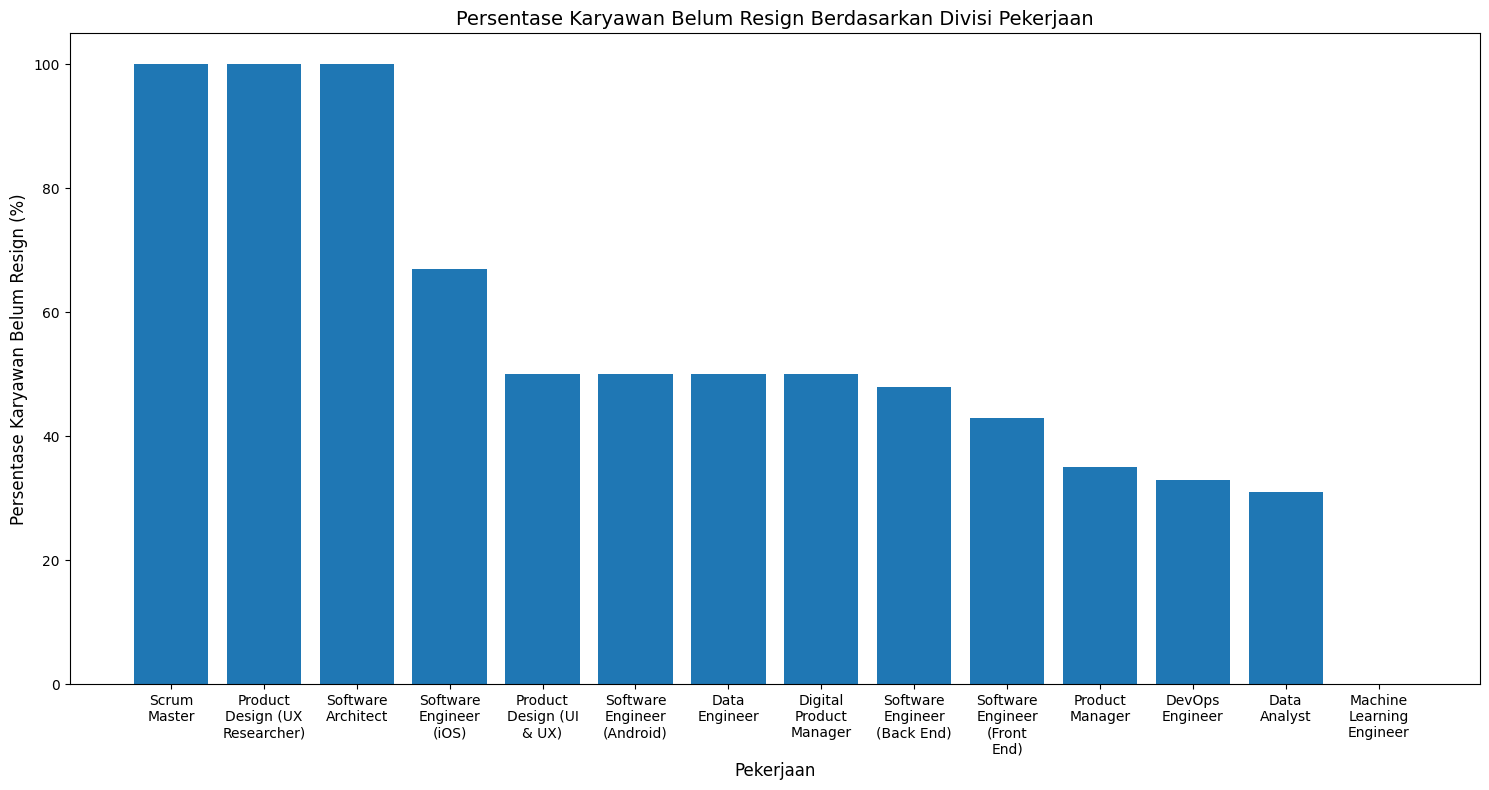

In [ ]:
# Sorting the dataframe based on the percentage of employees who haven't resigned (from highest to lowest)
sorted_merged_df = merged_df.sort_values('Persentase Belum Resign', ascending=False)

# Updating the job titles again for the sorted dataframe
updated_labels_sorted = [split_label(label, max_len=10) for label in sorted_merged_df['Pekerjaan']]

# Plotting the bar plot with updated labels and sorted values
plt.figure(figsize=[15,8])
plt.bar(sorted_merged_df['Pekerjaan'], sorted_merged_df['Persentase Belum Resign'], tick_label=updated_labels_sorted)
plt.xlabel('Pekerjaan', fontsize=12)
plt.ylabel('Persentase Karyawan Belum Resign (%)', fontsize=12)
plt.title('Persentase Karyawan Belum Resign Berdasarkan Divisi Pekerjaan', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

Interpretasi Plot:

Berdasarkan barchart diatas, Scrum Master merupakan pekerjaan dengan persentase karyawan belum resign terbanyak di perusahaan X yang kemudian diikuti oleh Product Design dan Software Architect dimana ketiga pekerjaan tersebut belum memiliki karyawan yang resign sama sekali sehingga ketiganya berada pada urutan pertama.

In [ ]:
# Finding the division with the highest resign rate
division_with_highest_resign_rate = sorted_merged_df.iloc[-1]['Pekerjaan']

# Filtering the data for the division with the highest resign rate
division_data = resigned_df[resigned_df['Pekerjaan'] == division_with_highest_resign_rate]

# Aggregating the data based on Career Level, Employee Performance, and Reason for Resigning
aggregated_data = division_data.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='Jumlah_Resign')

# Displaying the division and the aggregated table
division_with_highest_resign_rate, aggregated_data.head()
# Displaying the divisions with the lowest percentage of employees who haven't resigned (i.e., highest resign rate)
sorted_merged_df.tail()

,Pekerjaan,Jumlah Resign,Jumlah Belum Resign,Jumlah Employee,Persentase Belum Resign
1,Software Engineer (Front End),41.0,31.0,72.0,43.0
5,Product Manager,11.0,6.0,17.0,35.0
7,DevOps Engineer,2.0,1.0,3.0,33.0
4,Data Analyst,11.0,5.0,16.0,31.0
8,Machine Learning Engineer,2.0,0.0,2.0,0.0


In [ ]:
# Filtering the data for the division with the highest resign rate ("Software Engineer (Front End)")
division_with_highest_resign_rate = "Software Engineer (Front End)"
division_data = resigned_df[resigned_df['Pekerjaan'] == division_with_highest_resign_rate]

# Aggregating the data based on Career Level, Employee Performance, and Reason for Resigning
aggregated_data_highest_resign_rate = division_data.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='Jumlah_Resign')

# Displaying the division and the aggregated table
division_with_highest_resign_rate, aggregated_data_highest_resign_rate.head()

('Software Engineer (Front End)',
             JenjangKarir PerformancePegawai       AlasanResign  Jumlah_Resign
 0  Freshgraduate_program              Bagus    Tidak_Diketahui              2
 1  Freshgraduate_program              Bagus          jam_kerja              2
 2  Freshgraduate_program              Bagus  tidak_bisa_remote              1
 3  Freshgraduate_program              Biasa    Tidak_Diketahui              2
 4  Freshgraduate_program              Biasa          apresiasi              1)

<ipython-input-40-7e0a46f9c2d7>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pivot_data['Total_Resign'] = pivot_data.sum(axis=1)


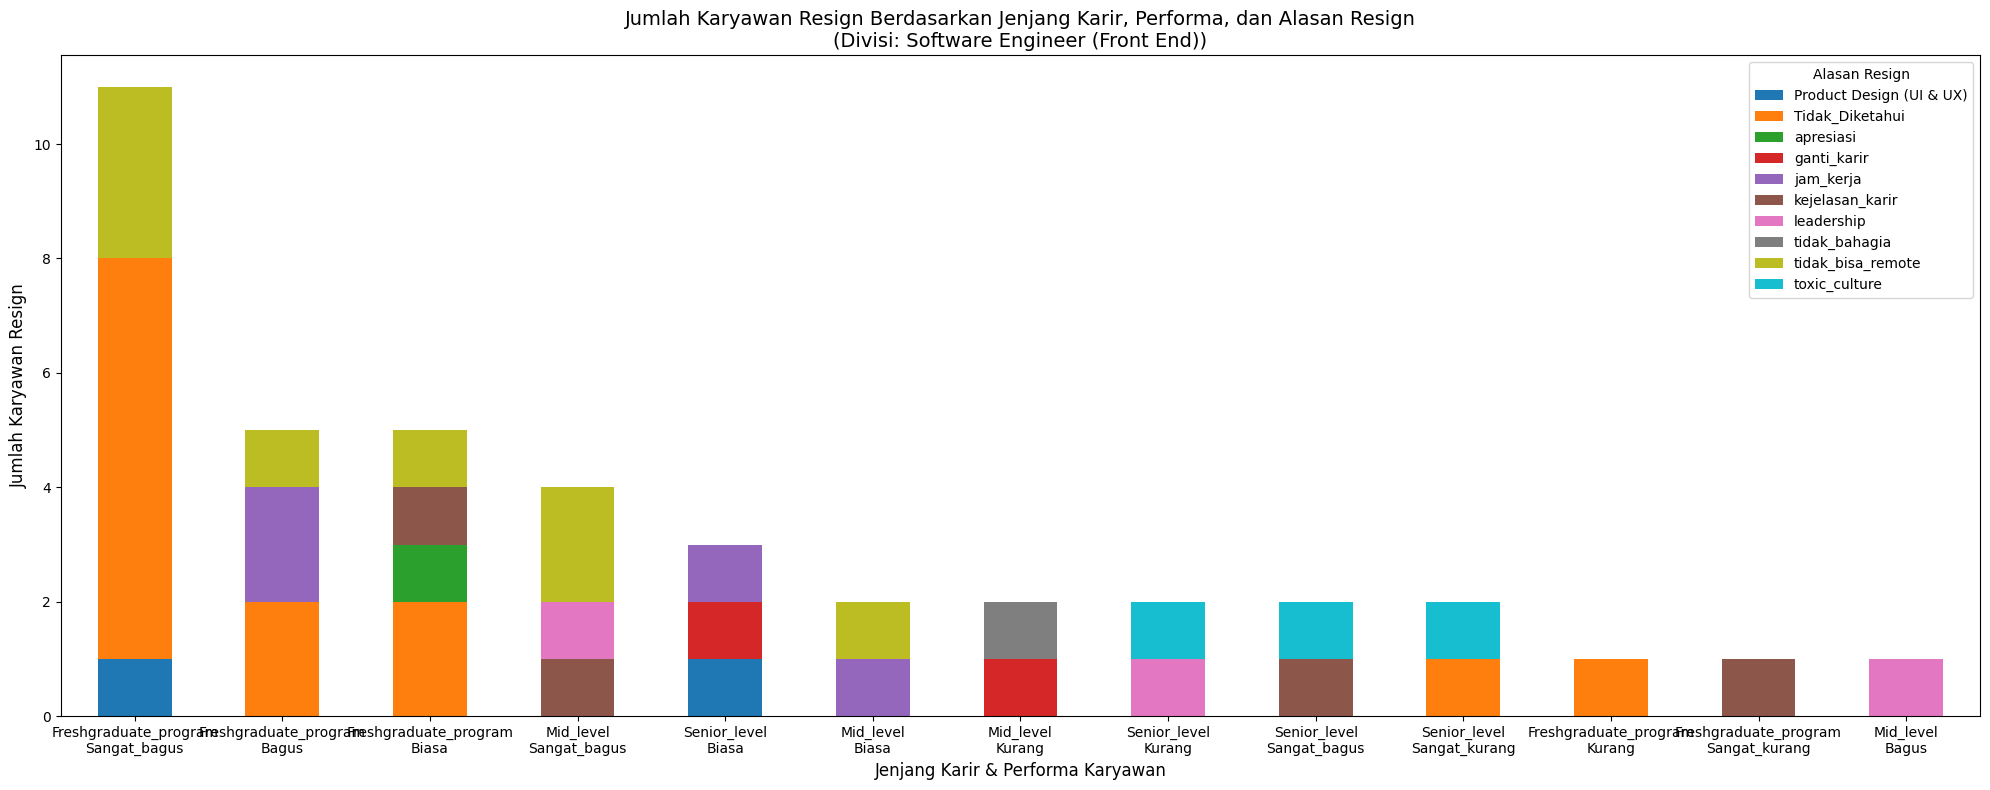

In [ ]:
# Preparing the data for the plot
pivot_data = aggregated_data_highest_resign_rate.pivot_table(index=['JenjangKarir', 'PerformancePegawai'], columns='AlasanResign', values='Jumlah_Resign', fill_value=0)
pivot_data = pivot_data.reset_index()

# Adding a column for the total resign count for sorting purpose
pivot_data['Total_Resign'] = pivot_data.sum(axis=1)

# Sorting the data by the total resign count (from highest to lowest)
sorted_pivot_data = pivot_data.sort_values('Total_Resign', ascending=False)

# Updating the index labels to split long ones into multiple lines
updated_index_labels = [f"{row['JenjangKarir']}\n{row['PerformancePegawai']}" for _, row in sorted_pivot_data.iterrows()]

# Plotting the sorted stacked bar plot with updated labels
ax = sorted_pivot_data.set_index(['JenjangKarir', 'PerformancePegawai']).drop(columns='Total_Resign').plot(kind='bar', stacked=True, figsize=(20, 8))
plt.xlabel('Jenjang Karir & Performa Karyawan', fontsize=12)
plt.ylabel('Jumlah Karyawan Resign', fontsize=12)
plt.title('Jumlah Karyawan Resign Berdasarkan Jenjang Karir, Performa, dan Alasan Resign\n(Divisi: Software Engineer (Front End))', fontsize=14)
plt.legend(title='Alasan Resign')
plt.xticks(ticks=range(len(updated_index_labels)), labels=updated_index_labels, rotation=0)
plt.tight_layout()
plt.show()

#Cek Kembali kepada tahap data preprocessing yang dilakukan pada tugas 1

In [ ]:
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,NaT,2011,<NA>
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-06-16,2014,2018
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,2011,2014
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,2014,<NA>
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,2013,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,...,+6283343465xxx,dopeySheep0297@icloud.com,Sarjana,Tidak_Diketahui,1973-12-08,2011-09-26,2016-03-01,NaT,2011,<NA>
283,yearningPorpoise4,106254,-,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,...,+6281222782xxx,yearningPorpoise4421@yahoo.com,Sarjana,jam_kerja,1974-12-01,2013-05-13,2020-1-28,2017-11-15,2013,2017
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,...,+6285821950xxx,murkySausage9688@yahoo.com,Sarjana,ganti_karir,1969-10-30,2013-11-11,2020-1-21,2018-06-08,2013,2018
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,...,+6287787391xxx,truthfulMoth4663@yahoo.com,Sarjana,kejelasan_karir,1981-10-01,2011-05-16,2014-04-05,2018-04-01,2011,2018


In [ ]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                         198
TahunHiring                       

In [ ]:
# Mendeteksi missing values dalam data
missing_values = df.isnull().sum()
print(missing_values)

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
TahunHiring                           0
TahunResign                           0


In [ ]:
# Mengisi missing values dengan metode ffill (menggunakan nilai sebelumnya)
df.fillna(method='ffill', inplace=True)

In [ ]:
# Jumlah duplikat dalam dataset
duplicate_rows = df.duplicated().sum()
print(f'Jumlah baris duplikat: {duplicate_rows}')

# Menghapus baris duplikat
df = df.drop_duplicates()

Jumlah baris duplikat: 0


In [ ]:
# Mengkonversi kolom dengan tipe data Int64 ke float64
for column in df.select_dtypes(include=['Int64']).columns:
    df[column] = df[column].astype('float64')

# Mengisi nilai yang hilang untuk fitur numerik dengan median
for column in df.select_dtypes(include=['float64']).columns:
    df[column] = df[column].fillna(df[column].median())

# Memeriksa kembali apakah masih ada missing values
missing_values_after_conversion = df.isnull().sum().sum()
missing_values_after_conversion

1

In [ ]:
# Mencari kolom dengan missing values
missing_values_columns = df.isnull().sum()
missing_values_columns[missing_values_columns > 0]

TanggalResign    1
dtype: int64

In [ ]:
df = df.dropna(subset=['TanggalResign'])

In [ ]:
# Mencari kolom dengan missing values
missing_values_columns = df.isnull().sum()
missing_values_columns[missing_values_columns > 0]

Series([], dtype: int64)

In [ ]:
# Mendeteksi baris yang duplikat
duplicate_rows = df.duplicated()

# Jumlah baris yang duplikat
number_of_duplicate_rows = duplicate_rows.sum()
number_of_duplicate_rows

0

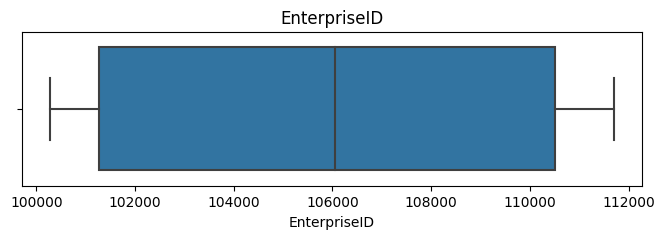

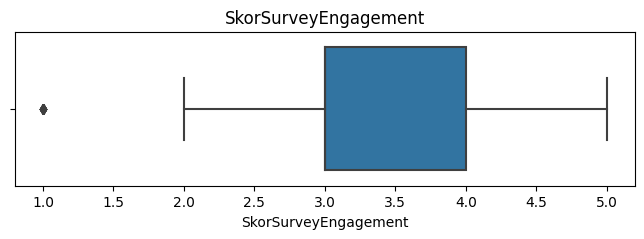

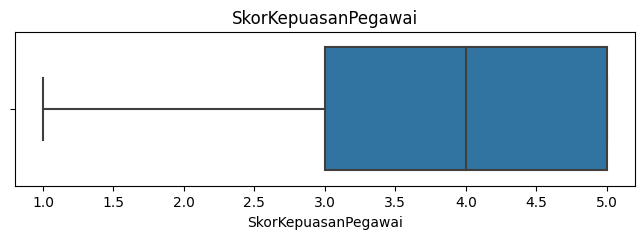

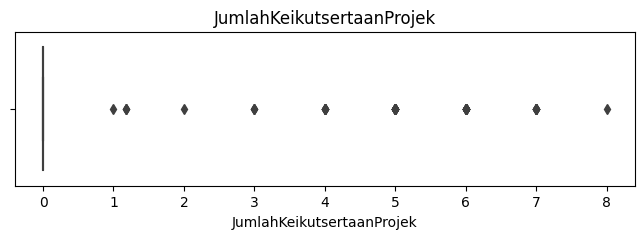

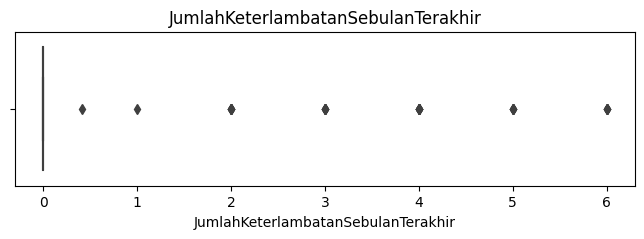

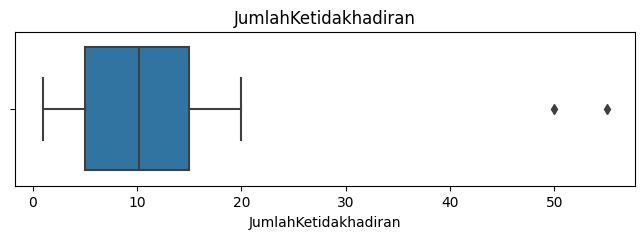

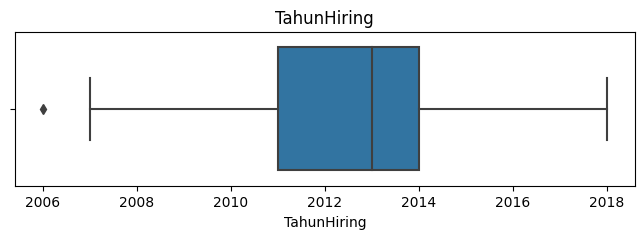

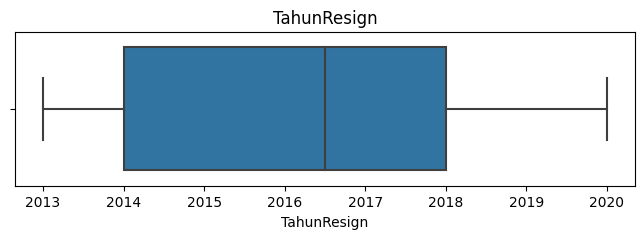

In [ ]:
# Menampilkan boxplot untuk setiap fitur numerik untuk mengidentifikasi pencilan
for column in df.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

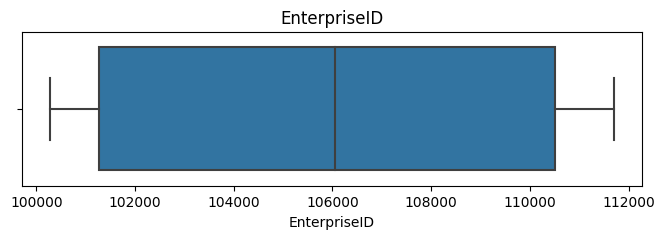

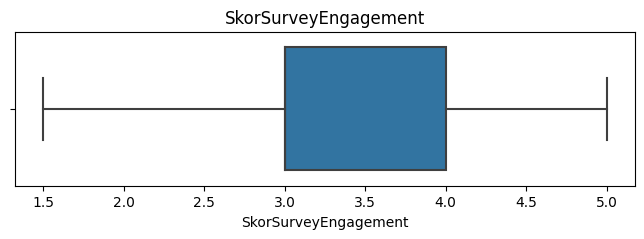

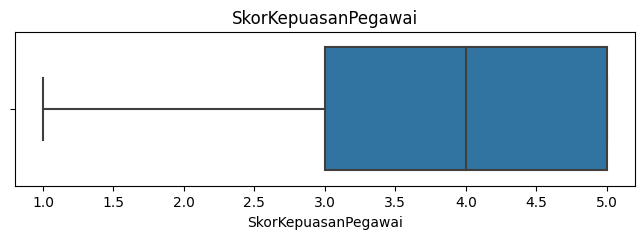

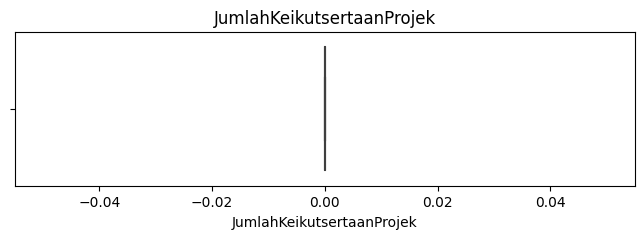

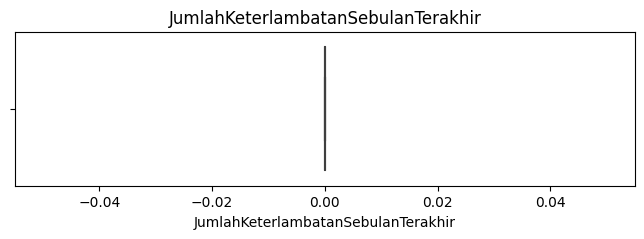

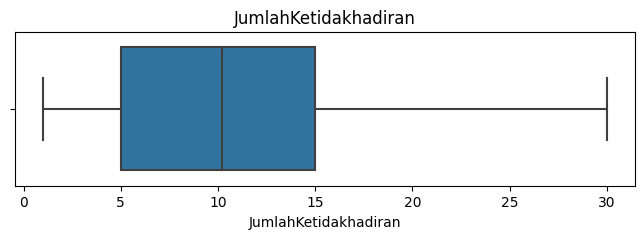

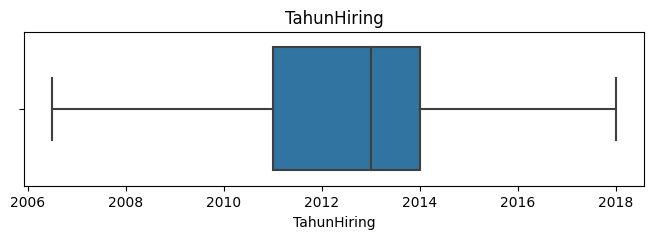

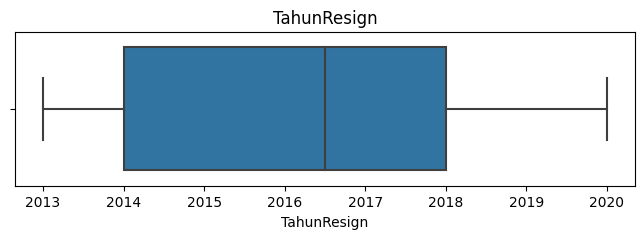

In [ ]:
# Fungsi untuk menanggulangi pencilan menggunakan metode IQR
def handle_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower_bound, upper_bound)

# Mengaplikasikan fungsi untuk menanggulangi pencilan pada setiap fitur numerik
for column in df.select_dtypes(include=['float64']).columns:
    df[column] = handle_outliers(df[column])

# Menampilkan boxplot setelah menanggulangi pencilan
for column in df.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

In [ ]:
# Menampilkan fitur kategorikal dalam dataset
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features_summary = {feature: df[feature].nunique() for feature in categorical_features}
categorical_features_summary

{'Username': 284,
 'StatusPernikahan': 4,
 'JenisKelamin': 2,
 'StatusKepegawaian': 3,
 'Pekerjaan': 14,
 'JenjangKarir': 3,
 'PerformancePegawai': 5,
 'AsalDaerah': 5,
 'HiringPlatform': 9,
 'NomorHP': 286,
 'Email': 286,
 'TingkatPendidikan': 3,
 'AlasanResign': 12,
 'TanggalLahir': 283,
 'TanggalPenilaianKaryawan': 126}

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi fitur (X) dan target (y)
X = df.drop(columns=['AlasanResign'])
y = df['AlasanResign']

# Memisahkan data menjadi training dan testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan jumlah sampel dalam training dan testing sets
len(X_train), len(X_test)

(228, 58)

In [ ]:
# 1. Memisahkan Data
from sklearn.model_selection import train_test_split

X = df.drop(columns=['AlasanResign'])
y = df['AlasanResign']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menggabungkan data training dan testing
X_combined = pd.concat([X_train, X_test], keys=['train', 'test'])

# Mengkonversi semua nilai dalam kolom kategorikal menjadi string
for column in X_combined.select_dtypes(include=['object']).columns:
    X_combined[column] = X_combined[column].astype(str)

# Melakukan Label Encoding pada fitur kategorikal yang relevan
columns_to_ignore = ['Username', 'NomorHP', 'Email', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']
for column in X_combined.select_dtypes(include=['object']).columns:
    if column not in columns_to_ignore:
        le = LabelEncoder()
        X_combined[column] = le.fit_transform(X_combined[column])

# Memisahkan kembali data training dan testing
X_train_encoded = X_combined.xs('train')
X_test_encoded = X_combined.xs('test')

# 2. Menyeimbangkan Data Training
# Menggabungkan data training
training_data = pd.concat([X_train_encoded.drop(columns=columns_to_ignore), y_train], axis=1)

# Menemukan kelas mayoritas
majority_class = training_data['AlasanResign'].mode()[0]
majority_data = training_data[training_data['AlasanResign'] == majority_class]

# Melakukan resampling pada setiap kelas minoritas
majority_class_count = majority_data.shape[0]
resampled_data = [majority_data]
for class_label in y_train.unique():
    if class_label != majority_class:
        minority_class_data = training_data[training_data['AlasanResign'] == class_label]
        resampled_class_data = resample(minority_class_data, replace=True, n_samples=majority_class_count, random_state=42)
        resampled_data.append(resampled_class_data)

# Menggabungkan data yang telah di-resample
balanced_data = pd.concat(resampled_data)
X_train_resampled = balanced_data.drop(columns=['AlasanResign'])
y_train_resampled = balanced_data['AlasanResign']

In [ ]:
# Mengkonversi semua nilai dalam kolom kategorikal menjadi string
for column in X_combined.columns:
    X_combined[column] = X_combined[column].astype(str)

# Melakukan Label Encoding pada fitur kategorikal yang relevan
for column in X_combined.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_combined[column] = le.fit_transform(X_combined[column])

# Memisahkan kembali data training dan testing
X_train_encoded = X_combined.xs('train')
X_test_encoded = X_combined.xs('test')

# Menggabungkan data training
training_data = pd.concat([X_train_encoded, y_train.astype(str)], axis=1)

# Menemukan kelas mayoritas
majority_class = training_data['AlasanResign'].mode()[0]
majority_data = training_data[training_data['AlasanResign'] == majority_class]

# Melakukan resampling pada setiap kelas minoritas
majority_class_count = majority_data.shape[0]
resampled_data = [majority_data]
for class_label in y_train.unique():
    class_label_str = str(class_label)
    if class_label_str != majority_class:
        minority_class_data = training_data[training_data['AlasanResign'] == class_label_str]
        resampled_class_data = resample(minority_class_data, replace=True, n_samples=majority_class_count, random_state=42)
        resampled_data.append(resampled_class_data)

# Menggabungkan data yang telah di-resample
balanced_data = pd.concat(resampled_data)
X_train_resampled = balanced_data.drop(columns=['AlasanResign'])
y_train_resampled = balanced_data['AlasanResign']

# Menampilkan beberapa baris pertama dari data training yang telah disimbangkan
X_train_resampled.head(), y_train_resampled.value_counts()

(     Username  EnterpriseID  StatusPernikahan  JenisKelamin  \
 145       102           130                 0             1   
 45        103            88                 0             1   
 31        240           163                 1             0   
 116       283           113                 3             1   
 96         51           244                 3             1   
 
      StatusKepegawaian  Pekerjaan  JenjangKarir  PerformancePegawai  \
 145                  0          3             2                   0   
 45                   0          3             2                   3   
 31                   2          4             1                   0   
 116                  0          4             2                   0   
 96                   0          2             0                   0   
 
      AsalDaerah  HiringPlatform  ...  JumlahKetidakhadiran  NomorHP  Email  \
 145           1               4  ...                     8      218    104   
 45            1      

In [ ]:
# Daftar model
models = [
    ('Logistic Regression', LogisticRegression(max_iter=10000, random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# Penskalaan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_encoded)

# Hasil evaluasi
evaluation_results = []

# Melatih dan mengevaluasi setiap model
for name, model in models:
    # Pelatihan model
    model.fit(X_train_scaled, y_train_resampled)

    # Prediksi pada set pengujian
    y_pred = model.predict(X_test_scaled)

    # Menghitung metrik
    accuracy = accuracy_score(y_test.astype(str), y_pred)
    f1 = f1_score(y_test.astype(str), y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_test.astype(str), y_pred)

    # Menyimpan hasil
    evaluation_results.append((name, accuracy, f1, confusion_mat))

# Menampilkan hasil evaluasi
evaluation_results = [(name, f"Accuracy: {accuracy:.2f}", f"F1-Score: {f1:.2f}", f"Confusion Matrix:\n{confusion_mat}") for name, accuracy, f1, confusion_mat in evaluation_results]
evaluation_results

[('Logistic Regression',
  'Accuracy: 0.16',
  'F1-Score: 0.20',
  'Confusion Matrix:\n[[0 0 0 0 0 0 0 0 1 0 0 0]\n [0 2 0 3 0 2 2 0 1 0 3 0]\n [0 0 0 0 0 0 0 0 0 0 0 0]\n [0 0 0 0 0 0 0 0 1 2 0 0]\n [0 0 0 0 0 1 0 0 0 0 0 0]\n [0 1 0 1 0 0 0 0 0 0 1 0]\n [0 0 0 0 0 0 0 0 1 0 1 0]\n [0 1 0 0 1 0 0 0 0 0 0 0]\n [0 3 1 2 0 2 3 3 6 3 1 3]\n [0 0 0 0 0 0 1 0 0 0 0 1]\n [0 1 0 0 0 0 0 0 0 1 0 0]\n [0 0 0 0 0 0 1 0 0 0 0 1]]'),
 ('Random Forest',
  'Accuracy: 0.43',
  'F1-Score: 0.36',
  'Confusion Matrix:\n[[ 0  0  0  0  0  0  0  1  0  0  0]\n [ 0  6  1  0  0  0  0  6  0  0  0]\n [ 0  1  0  0  0  0  0  2  0  0  0]\n [ 0  0  0  0  0  0  0  1  0  0  0]\n [ 0  1  0  0  0  0  0  2  0  0  0]\n [ 0  1  0  0  0  0  0  1  0  0  0]\n [ 0  1  0  0  0  0  0  1  0  0  0]\n [ 0  7  1  0  0  0  0 19  0  0  0]\n [ 0  0  0  0  0  0  0  2  0  0  0]\n [ 0  1  0  0  0  0  0  1  0  0  0]\n [ 0  0  0  0  0  0  0  2  0  0  0]]'),
 ('SVM',
  'Accuracy: 0.41',
  'F1-Score: 0.36',
  'Confusion Matrix:\n[[ 0  0  0  

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Membuat pipeline dengan penskalaan dan model Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

# Parameter grid untuk tuning
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Membuat GridSearchCV dengan cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Melakukan Grid Search pada data training
grid_search.fit(X_train_resampled, y_train_resampled)

# Hasil terbaik
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
best_params = grid_search.best_params_

best_score, best_params

Fitting 5 folds for each of 108 candidates, totalling 540 fits


(0.9738053999596531,
 {'model__max_depth': None,
  'model__min_samples_leaf': 1,
  'model__min_samples_split': 2,
  'model__n_estimators': 200})

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


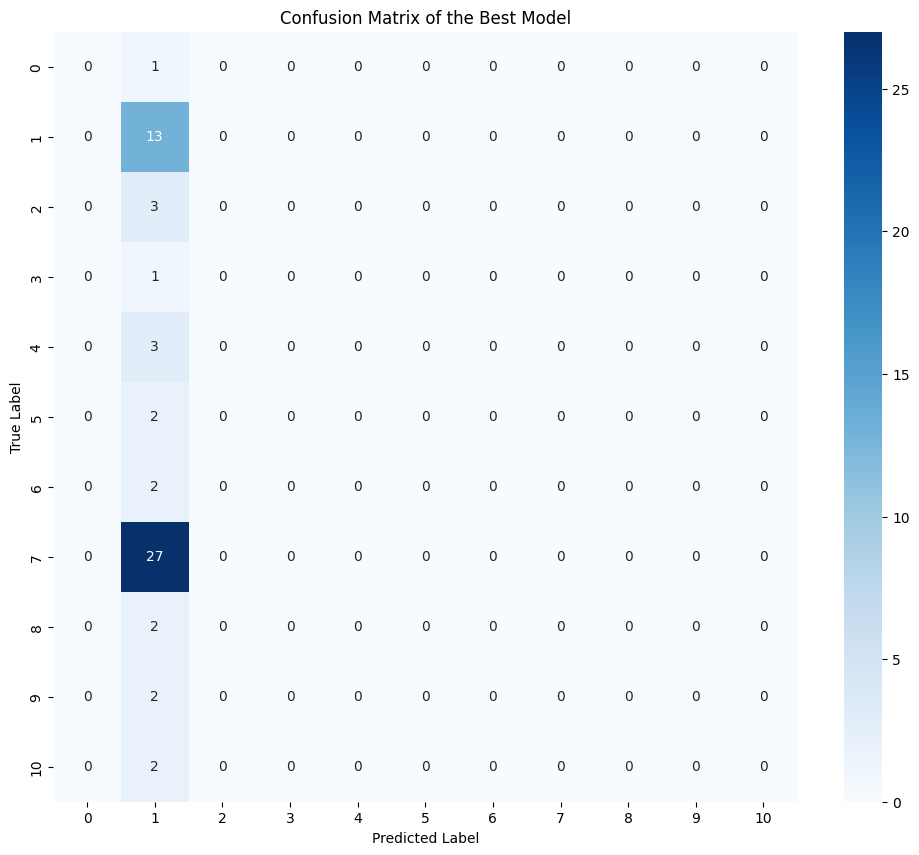

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Prediksi pada set pengujian
y_pred_best = best_model.predict(X_test_scaled)

# Menghitung Confusion Matrix
confusion_mat_best = confusion_matrix(y_test.astype(str), y_pred_best)

# Plot Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mat_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of the Best Model')
plt.show()

# Menghitung akurasi dan F1-Score untuk model terbaik
accuracy_best = accuracy_score(y_test.astype(str), y_pred_best)
f1_best = f1_score(y_test.astype(str), y_pred_best, average='weighted')

Di era bisnis modern, retensi karyawan telah menjadi tantangan utama bagi banyak organisasi. Perusahaan X, yang mengalami kenaikan jumlah karyawan yang resign, memahami bahwa solusi tradisional tidak lagi memadai. Dengan mengadopsi pendekatan yang didorong oleh data, perusahaan berinvestasi dalam model machine learning untuk memprediksi dan menganalisis faktor-faktor yang menyebabkan karyawan mengundurkan diri. Model ini, yang terdiri dari algoritma yang canggih dan didukung oleh data riil, membuka pintu ke wawasan yang belum pernah terjadi sebelumnya. Analisis ini mengungkap variabel penting seperti gaji, jam kerja, dan peluang karir yang mempengaruhi keputusan seseorang untuk pergi. Maknanya jelas: Untuk mempertahankan talenta terbaik, perusahaan harus beradaptasi dan merespons kebutuhan karyawan dengan cara yang lebih dinamis dan personal. Rekomendasi dari model ini tidak hanya bersifat teoritis tetapi operasional, mengarah ke langkah-langkah konkret seperti penyesuaian paket kompensasi dan pengembangan program pengembangan karir. Dengan demikian, model machine learning bukan hanya alat analitis tetapi bagian integral dari strategi bisnis Perusahaan X, membantu dalam menavigasi tantangan retensi dan membentuk masa depan yang lebih stabil dan sejahtera bagi seluruh tim.